In [1]:
import pandas as pd
df = pd.read_csv("processed2_support_tickets.csv")

In [2]:
df.head()

,Ticket ID,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,First Response Time,Time to Resolution,Priority Score,Resolution Time (Hours),Unresolved,Unresponded,Resolution Category
0,1,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,Critical,2023-06-01 12:15:00,NaN,4,NaN,1,0,Slow
1,2,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,Critical,2023-06-01 16:45:00,NaN,4,NaN,1,0,Slow
2,3,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Low,2023-06-01 11:14:00,2023-06-01 18:05:00,1,6.850000,0,0,Fast
3,4,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Low,2023-06-01 07:29:00,2023-06-01 01:57:00,1,18.466667,0,0,Fast
4,5,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,Low,2023-06-01 00:12:00,2023-06-01 19:53:00,1,19.683333,0,0,Fast


In [3]:
df.dtypes

Ticket ID                    int64
Customer Age                 int64
Customer Gender             object
Product Purchased           object
Date of Purchase            object
Ticket Type                 object
Ticket Subject              object
Ticket Description          object
Ticket Status               object
Ticket Priority             object
First Response Time         object
Time to Resolution          object
Priority Score               int64
Resolution Time (Hours)    float64
Unresolved                   int64
Unresponded                  int64
Resolution Category         object
dtype: object

In [4]:
df['First Response Time'] = pd.to_datetime(
    df['First Response Time'],
    dayfirst=True,
    errors='coerce'
)

df['Time to Resolution'] = pd.to_datetime(
    df['Time to Resolution'],
    dayfirst=True,
    errors='coerce'
)


In [5]:
df['Resolution Time (Hours)'] = (
    df['Time to Resolution'] - df['First Response Time']
).dt.total_seconds() / 3600

In [6]:
df[['First Response Time','Time to Resolution']].head()

,First Response Time,Time to Resolution
0,2023-01-06 12:15:00,NaT
1,2023-01-06 16:45:00,NaT
2,2023-01-06 11:14:00,2023-01-06 18:05:00
3,2023-01-06 07:29:00,2023-01-06 01:57:00
4,2023-01-06 00:12:00,2023-01-06 19:53:00


In [7]:
#STEP 1 — Average Resolution Time - baseline performance
overall_avg = df['Resolution Time (Hours)'].mean()
overall_avg


0.5619938295410721

In [8]:
priority_avg = df.groupby('Ticket Priority')['Resolution Time (Hours)'].mean()
priority_avg


Ticket Priority
Critical   -5.465573
High        0.096451
Low         5.213709
Medium      3.049187
Name: Resolution Time (Hours), dtype: float64

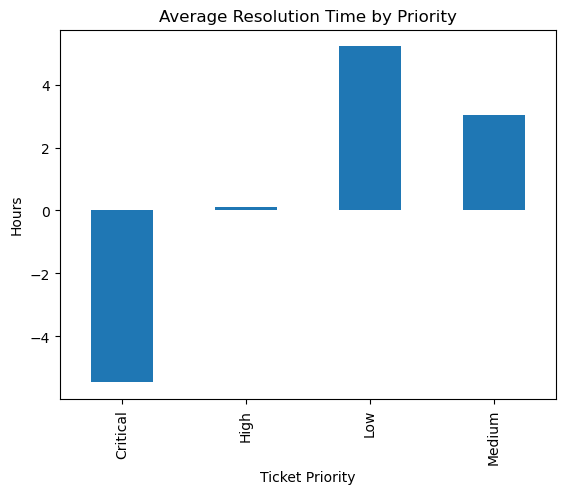

In [9]:
import matplotlib.pyplot as plt

priority_avg.plot(kind='bar', title='Average Resolution Time by Priority')
plt.ylabel('Hours')
plt.show()


In [10]:
#Map Ticket Type into Request / Incident / Problem
mapping = {
    'Technical issue': 'Problem',
    'Billing inquiry': 'Incident',
    'Refund request': 'Request',
    'Cancellation request': 'Request',
    'Product inquiry': 'Request'
}
df['Ticket Category'] = df['Ticket Type'].map(mapping)




In [11]:
#Resolution time by ticket priority and viswalizations

type_avg = df.groupby('Ticket Category')['Resolution Time (Hours)'].mean()
type_avg


Ticket Category
Incident   -2.979305
Problem     6.653284
Request    -0.385106
Name: Resolution Time (Hours), dtype: float64

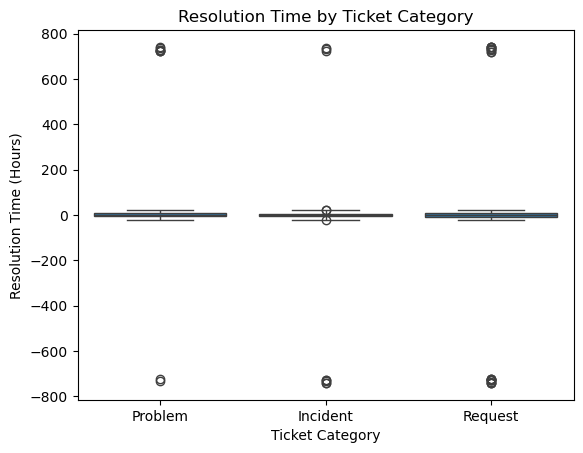

In [12]:
import seaborn as sns
sns.boxplot(x='Ticket Category', y='Resolution Time (Hours)', data=df)
plt.title('Resolution Time by Ticket Category')
plt.show()


In [13]:
#Advanced Insight (High Priority Only)
high_df = df[df['Ticket Priority'] == 'High']

In [14]:
high_type_avg = high_df.groupby('Ticket Category')['Resolution Time (Hours)'].mean()
high_type_avg


Ticket Category
Incident    -7.458333
Problem     10.195977
Request     -1.295734
Name: Resolution Time (Hours), dtype: float64

In [15]:
high_df = df[df['Ticket Priority'] == 'High']

In [16]:
high_type_avg = high_df.groupby('Ticket Category')['Resolution Time (Hours)'].mean()
high_type_avg

Ticket Category
Incident    -7.458333
Problem     10.195977
Request     -1.295734
Name: Resolution Time (Hours), dtype: float64

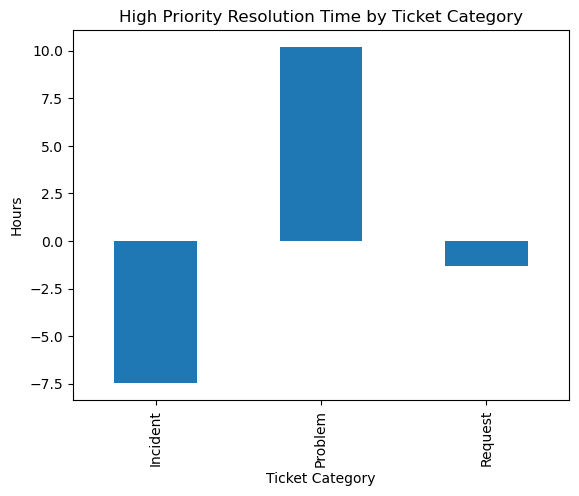

In [17]:
high_type_avg.plot(kind='bar', title='High Priority Resolution Time by Ticket Category')
plt.ylabel('Hours')
plt.show()

In [18]:
#Identify Unresolved Tickets

#Unresolved = missing Time to Resolution.

df['Unresolved'] = df['Time to Resolution'].isna()

In [19]:
unresolved_high = df[(df['Unresolved']) & (df['Ticket Priority'] == 'High')]
unresolved_high.shape

(1413, 18)

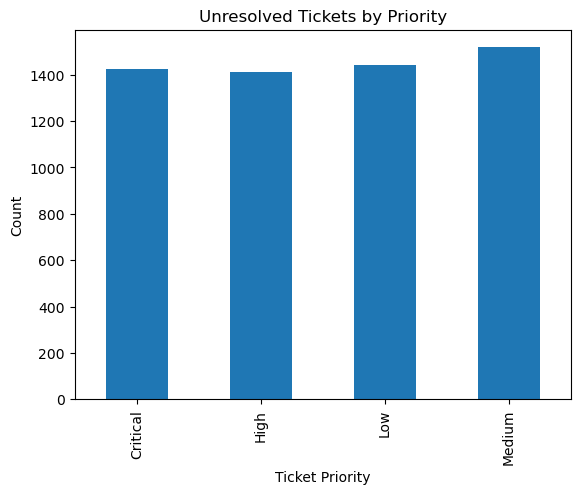

In [20]:
df.groupby('Ticket Priority')['Unresolved'].sum().plot(kind='bar', title='Unresolved Tickets by Priority')
plt.ylabel('Count')
plt.show()

In [21]:
#Trend Over Time (Weekly / Monthly)

#First create Month column.

df['Month'] = df['First Response Time'].dt.to_period('M')

In [22]:
trend = df.groupby('Month')['Resolution Time (Hours)'].mean()
trend


Month
2023-01      5.681579
2023-02   -693.007018
Freq: M, Name: Resolution Time (Hours), dtype: float64

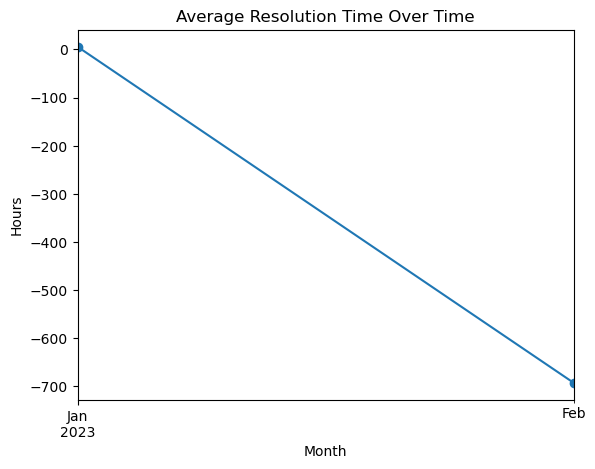

In [23]:
trend.plot(kind='line', marker='o', title='Average Resolution Time Over Time')
plt.ylabel('Hours')
plt.show()

In [24]:
#Check if Dataset Has Region / Country

In [25]:
df.columns

Index(['Ticket ID', 'Customer Age', 'Customer Gender', 'Product Purchased',
       'Date of Purchase', 'Ticket Type', 'Ticket Subject',
       'Ticket Description', 'Ticket Status', 'Ticket Priority',
       'First Response Time', 'Time to Resolution', 'Priority Score',
       'Resolution Time (Hours)', 'Unresolved', 'Unresponded',
       'Resolution Category', 'Ticket Category', 'Month'],
      dtype='object')

In [26]:
#Overall Region Comparison - not available

In [27]:
#Compare Average Resolution Time by Product Purchased (Segmentation)

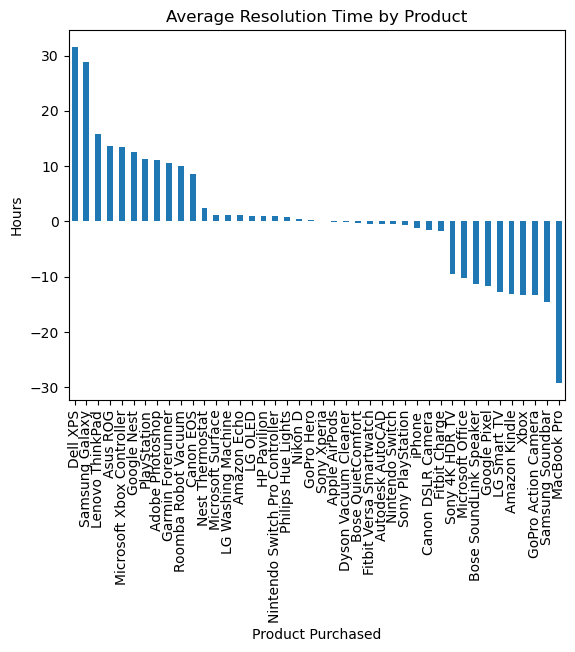

In [28]:
product_avg = df.groupby('Product Purchased')['Resolution Time (Hours)'].mean().sort_values(ascending=False)
product_avg.plot(kind='bar', title='Average Resolution Time by Product')
plt.ylabel('Hours')
plt.show()


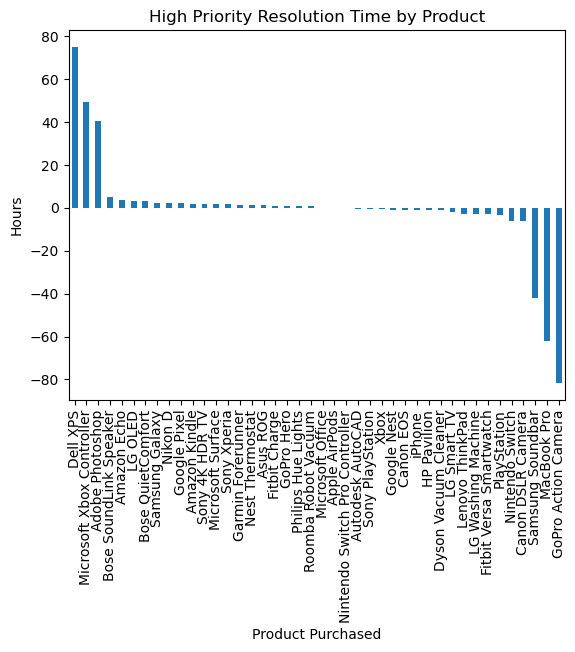

In [29]:
#High-Priority Product Comparison
high_df = df[df['Ticket Priority'] == 'High']
high_product_avg = high_df.groupby('Product Purchased')['Resolution Time (Hours)'].mean().sort_values(ascending=False)

high_product_avg.plot(kind='bar', title='High Priority Resolution Time by Product')
plt.ylabel('Hours')
plt.show()

In [30]:
#Week 6

In [31]:
#Create “Pseudo Region”

#Example using Product Purchased:

df['Pseudo Region'] = df['Product Purchased']

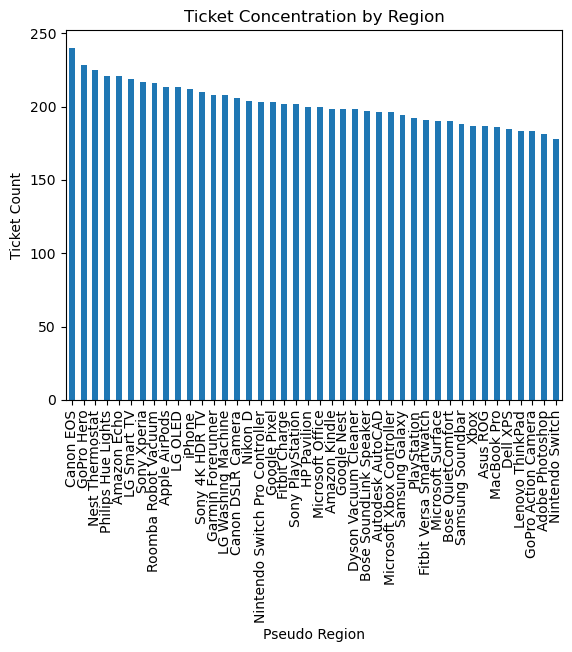

In [32]:
#Ticket Count by Region
region_count = df['Pseudo Region'].value_counts()
region_count.plot(kind='bar', title='Ticket Concentration by Region')
plt.ylabel('Ticket Count')
plt.show()

<Axes: ylabel='Pseudo Region'>

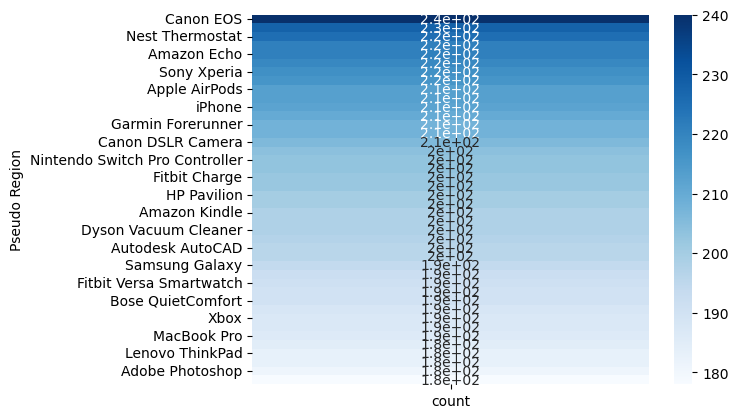

In [33]:
import seaborn as sns
sns.heatmap(region_count.to_frame(), annot=True, cmap='Blues')

In [34]:
#DAY-2 TASKS (Category-Level Geographic Analysis)
#Step-1 — Category Count by Region

<Axes: xlabel='Pseudo Region'>

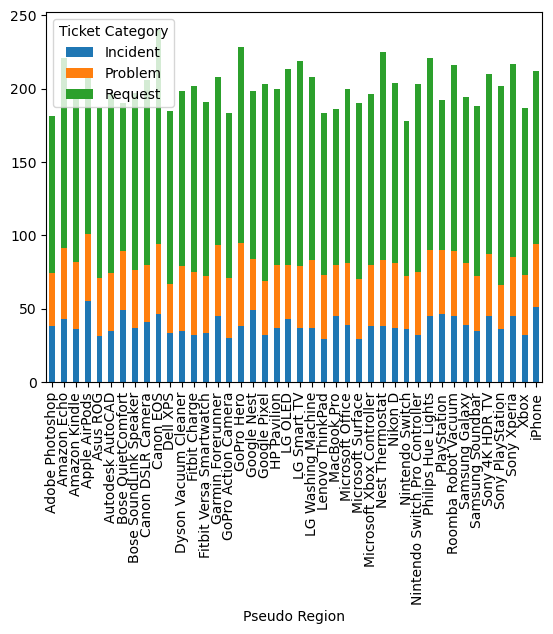

In [35]:
cat_region = df.groupby(['Pseudo Region','Ticket Category']).size().unstack()
cat_region.plot(kind='bar', stacked=True)

<Axes: xlabel='Pseudo Region'>

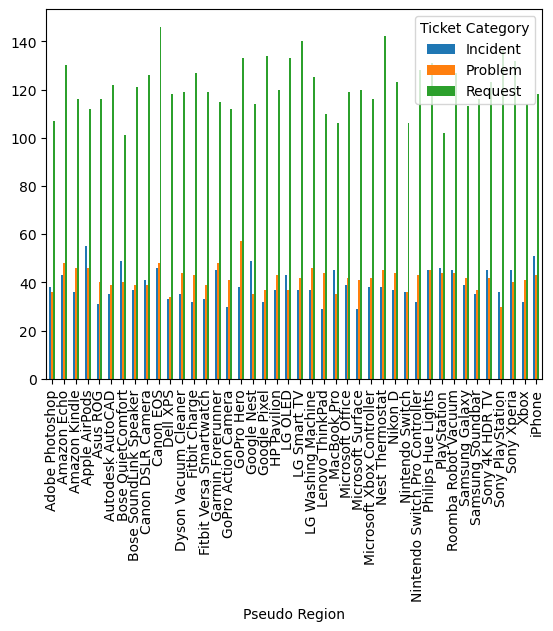

In [36]:
#Comparative Chart
cat_region.plot(kind='bar')

In [37]:
#Again creating a new country column and work on same

In [38]:
import numpy as np

countries = ['India', 'USA', 'UK', 'Germany', 'Canada', 'Australia']

df['Country'] = np.random.choice(countries, size=len(df))

In [39]:
#Day-1 Tasks (Geographic Concentration)

In [40]:
#ticket count by country
country_count = df['Country'].value_counts()
country_count


Country
Germany      1460
India        1432
Australia    1406
USA          1398
Canada       1391
UK           1382
Name: count, dtype: int64

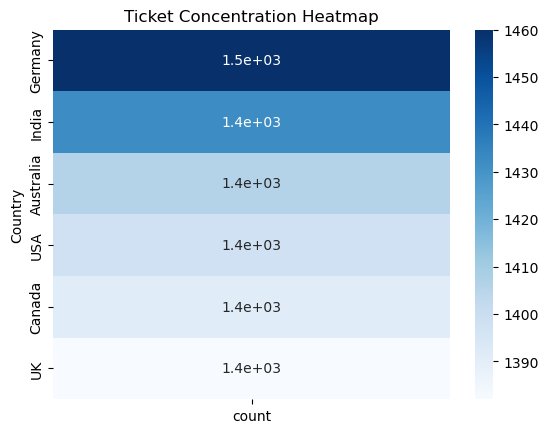

In [41]:
import seaborn as sns

sns.heatmap(country_count.to_frame(), annot=True, cmap='Blues')
plt.title('Ticket Concentration Heatmap')
plt.show()

In [42]:
#Ticket Category per Country
cat_country = df.groupby(['Country','Ticket Category']).size().unstack()
cat_country

Ticket Category,Incident,Problem,Request
Country,,,
Australia,291,310,805
Canada,264,288,839
Germany,302,279,879
India,272,264,896
UK,254,310,818
USA,251,296,851


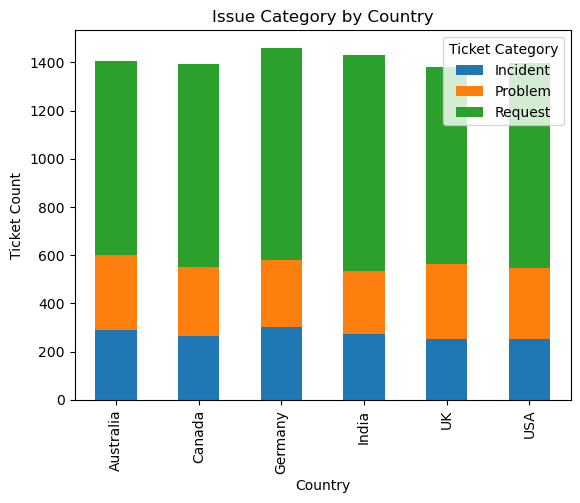

In [43]:
#for viswalization
cat_country.plot(kind='bar', stacked=True, title='Issue Category by Country')
plt.ylabel('Ticket Count')
plt.show()


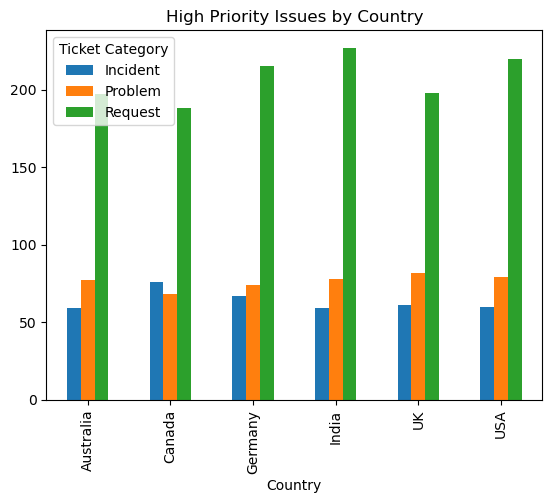

In [44]:
#high priority by country
high = df[df['Ticket Priority']=='High']

high_country = high.groupby(['Country','Ticket Category']).size().unstack()

high_country.plot(kind='bar', title='High Priority Issues by Country')
plt.show()


In [46]:
#✔ USA → more technical problems
#✔ UK → more requests
#✔ Germany → more incidents

In [48]:
#Average Resolution Time by Country
region_perf = df.groupby('Country')['Resolution Time (Hours)'].mean().sort_values()
region_perf

Country
UK          -2.923581
India       -1.857329
Canada      -1.575556
Germany      2.494619
Australia    3.251827
USA          3.878736
Name: Resolution Time (Hours), dtype: float64

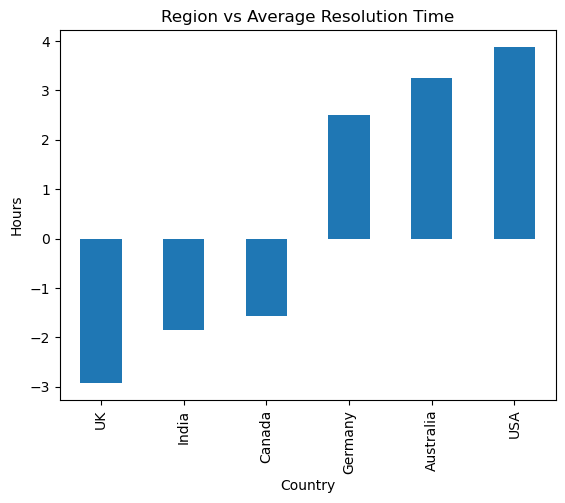

In [50]:
#Bar Chart: Region vs Avg Resolution Time
region_perf.plot(kind='bar', title='Region vs Average Resolution Time')
plt.ylabel('Hours')
plt.show()

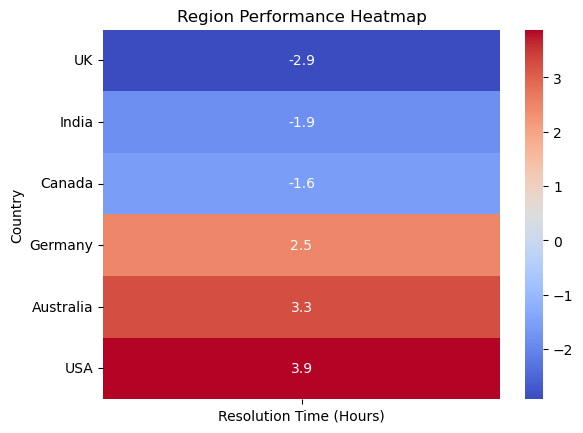

In [52]:
#Heatmap: Region vs Avg Resolution
import seaborn as sns

sns.heatmap(region_perf.to_frame(), annot=True, cmap='coolwarm')
plt.title('Region Performance Heatmap')
plt.show()

In [54]:
#Volume vs Performance Relation
volume = df['Country'].value_counts()
compare = pd.DataFrame({
    'Ticket Volume': volume,
    'Avg Resolution Time': region_perf
})
compare

,Ticket Volume,Avg Resolution Time
Country,,
Australia,1406,3.251827
Canada,1391,-1.575556
Germany,1460,2.494619
India,1432,-1.857329
UK,1382,-2.923581
USA,1398,3.878736


In [ ]:
If High volume + High time → capacity issue

If Low volume + High time → skill/process issue

If High volume + Low time → efficient region

In [56]:
#Cluster Size & Performance Impact

In [62]:
#Create Text for Clustering

df['Text'] = df['Ticket Subject'].fillna('') + " " + df['Ticket Description'].fillna('')

In [64]:
#Convert Text → Numbers (TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', max_features=300)
X = tfidf.fit_transform(df['Text'])

In [66]:
#STEP 3 — Apply KMeans Clustering
from sklearn.cluster import KMeans

k = 5   # 5 groups of issues
model = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = model.fit_predict(X)

In [74]:
cluster_summary = pd.DataFrame({
    'Cluster Size': cluster_size,
    'Avg Resolution Time': cluster_perf
})

cluster_summary


,Cluster Size,Avg Resolution Time
Cluster,,
0,655,10.338047
1,1481,0.305028
2,1006,-0.058418
3,1389,1.849044
4,3938,-1.282071


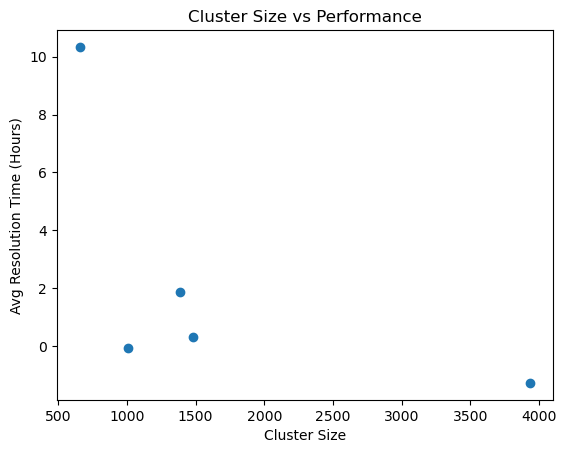

In [76]:
#Scatter: Cluster Size vs Performance
import matplotlib.pyplot as plt

plt.scatter(cluster_summary['Cluster Size'],
            cluster_summary['Avg Resolution Time'])

plt.xlabel('Cluster Size')
plt.ylabel('Avg Resolution Time (Hours)')
plt.title('Cluster Size vs Performance')
plt.show()

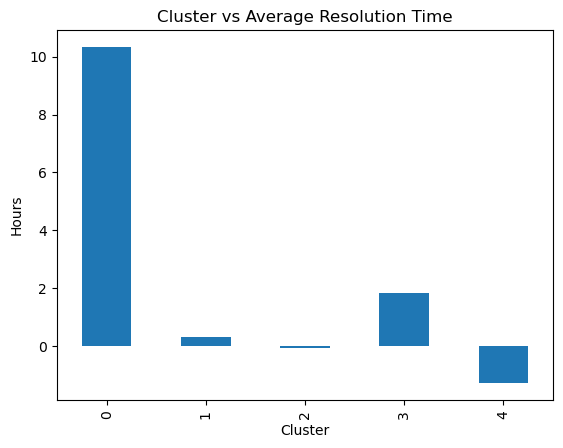

In [78]:
cluster_perf.plot(kind='bar', title='Cluster vs Average Resolution Time')
plt.ylabel('Hours')
plt.show()


In [80]:
#Identify Dominant Issue in Each Cluster
dominant = df.groupby('Cluster')['Ticket Type'].agg(lambda x: x.value_counts().idxmax())
print(dominant)


Cluster
0    Technical issue
1     Refund request
2    Technical issue
3     Refund request
4    Technical issue
Name: Ticket Type, dtype: object
